In [1]:
import yfinance as yf
import keras.backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, mean_squared_error,mean_absolute_percentage_error,r2_score
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM,Dropout, BatchNormalization, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras.models import Sequential
from keras.optimizer_v2.adam import Adam
from keras.optimizer_v2.rmsprop import RMSprop
import talib
from tensorflow.keras import layers
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline

2022-03-21 00:37:17.851144: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-21 00:37:17.851177: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# linear_model = tf.keras.Sequential([
#     layers.Dense(units=1)
# ])
linear_model = LinearRegression()

In [3]:
# linear_model.compile(
#     optimizer=tf.optimizers.Adam(learning_rate=0.1),
#     loss='mean_absolute_error')


In [4]:
data = yf.download('0005.hk')
data.head()

[*********************100%***********************]  1 of 1 completed


Open   High     Low  Close  Adj Close    Volume
Date                                                        
2000-01-03  111.0  111.5  107.50  108.0  55.184654   3908164
2000-01-04  106.0  106.5  105.00  106.0  54.162704   6895378
2000-01-05  101.0  102.0   99.50  100.5  51.352398  14657098
2000-01-06  101.0  102.0   96.25   97.0  49.564003  10632084
2000-01-07   98.5  101.0   97.50  100.5  51.352398   8368286

In [9]:
data['6day MA'] = data['Close'].rolling(window = 6).mean()
data['RSI'] = talib.RSI(data['Close'].values, timeperiod = 7)
data['%R5'] = talib.WILLR(data['High'].values, data['Low'].values, data['Close'].values, 5)
data['%R10'] = talib.WILLR(data['High'].values, data['Low'].values, data['Close'].values, 10)
macd, macdsignal, macdhist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
data['EMA12']=talib.EMA(data['Close'], timeperiod=12)
data['MACD']=macd
data.dropna(inplace=True)
data

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2000-02-17  92.000000  94.250000  92.000000  93.000000  47.520130  10789190   
2000-02-18  93.000000  93.500000  90.500000  91.250000  46.625904  10116832   
2000-02-21  90.000000  91.000000  88.500000  89.500000  45.731731   8839331   
2000-02-22  88.750000  89.000000  88.000000  88.750000  45.348488  11567491   
2000-02-23  87.750000  88.750000  87.500000  88.250000  45.092987  15418845   
...               ...        ...        ...        ...        ...       ...   
2022-03-14  48.849998  49.650002  48.599998  49.599998  49.599998  30122708   
2022-03-15  49.799999  49.799999  48.549999  49.200001  49.200001  44267673   
2022-03-16  49.700001  49.750000  48.150002  49.200001  49.200001  43856918   
2022-03-17  50.500000  51.599998  49.750000  51.200001  51.200001  41290933   
2022-03-18  51.200001  51.750000  50.799999  51.400002  51.400002  21768112   

              6day MA        RSI        %R5       %R10      EMA12      MACD  
Date                                                                         
2000-02-17  90.125000  60.362723 -15.625000 -15.625000  90.957998 -2.199447  
2000-02-18  90.375000  50.586255 -37.500000 -37.500000  91.002922 -1.999471  
2000-02-21  90.250000  42.546797 -59.375000 -59.375000  90.771703 -1.959610  
2000-02-22  90.458333  39.414785 -88.000000 -68.750000  90.460672 -1.965877  
2000-02-23  90.541667  37.280307 -88.888889 -75.000000  90.120568 -1.988270  
...               ...        ...        ...        ...        ...       ...  
2022-03-14  48.783333  37.479856  -2.439170 -69.465663  50.988487 -1.697750  
2022-03-15  49.008333  35.269015 -31.578905 -72.413768  50.713335 -1.714662  
2022-03-16  49.208333  35.269015 -31.578905 -72.413768  50.480515 -1.708372  
2022-03-17  49.533333  53.811244 -10.810758 -15.294064  50.591205 -1.524431  
2022-03-18  49.908333  55.304925  -9.722184  -8.433695  50.715635 -1.346991  

[5521 rows x 12 columns]

In [10]:
# Split the data into train and test with 90 & 10 % respectively
X=data.drop(['Adj Close'],1).values
y=data['Adj Close'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
y_test

/tmp/ipykernel_2587/3485372040.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=data.drop(['Adj Close'],1).values


array([64.10957336, 64.15166473, 64.15166473, ..., 49.20000076,
       51.20000076, 51.40000153])

In [11]:
linear_model.fit(
    X_train,
    y_train)


LinearRegression()

In [12]:
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label='val_loss')
# plt.xlabel('Epoch')
# plt.ylabel('Error')
# plt.legend()
# plt.grid(True)


In [13]:
y_pred=linear_model.predict(X_test)

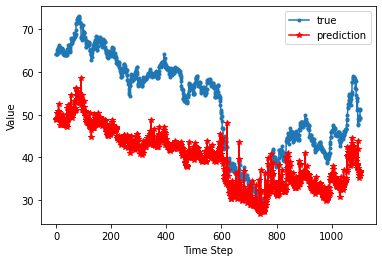

In [14]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r',marker='*', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()

In [15]:
mean_squared_error(y_test,y_pred,squared=False)

13.532602420687867

In [16]:
mean_absolute_percentage_error(y_test,y_pred)

0.22849385943172573

In [17]:
r2_score(y_test,y_pred)

-0.4613967580267284